In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_regression
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px 



In [80]:
df_modelisation = pd.read_csv('df2.csv')
df_modelisation.head()

,Unnamed: 0,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,...,zipcode_98105,sqft_lot,zipcode_98075,zipcode_98199,sqft_lot15,zipcode_98168,zipcode_98001,zipcode_98042,zipcode_98023,long
0,0,221900.0,1180,7,1180,1340,1.00,0,0,3,...,0,5650,0,0,5650,0,0,0,0,-122.257
1,1,538000.0,2570,7,2170,1690,2.25,0,400,3,...,0,7242,0,0,7639,0,0,0,0,-122.319
2,2,180000.0,770,6,770,2720,1.00,0,0,2,...,0,10000,0,0,8062,0,0,0,0,-122.233
3,3,604000.0,1960,7,1050,1360,3.00,0,910,4,...,0,5000,0,0,5000,0,0,0,0,-122.393
4,4,510000.0,1680,8,1680,1800,2.00,0,0,3,...,0,8080,0,0,7503,0,0,0,0,-122.045


### Sélection de modele

In [81]:

X = df_modelisation[['sqft_living','grade','sqft_above','sqft_living15','bathrooms','view','sqft_basement',
'bedrooms','zipcode_98004','waterfront','floors','zipcode_98039','zipcode_98040','zipcode_98112','zipcode_98006',
'yr_renovated','zipcode_98033','zipcode_98105','sqft_lot','zipcode_98075','zipcode_98199','sqft_lot15','zipcode_98001',
'zipcode_98042','zipcode_98023']]
y = df_modelisation[['price']]

In [82]:
X_train, X_test,y_train , y_test = train_test_split(X, y, test_size=0.2)

print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (17276, 25)
Test set: (4320, 25)


In [83]:
model = LinearRegression()
model = model.fit(X_train,y_train)

In [84]:
accurancy = model.score(X_test, y_test)
accurancy = round(accurancy*100, 3)
print(f'Précision sans Normalisation est : {accurancy}%')

Précision sans Normalisation est : 73.78%


Normalisation 

In [85]:
normalized_X = MinMaxScaler().fit_transform(X)

norm_x_train, norm_x_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.2)

model = LinearRegression()
model = model.fit(norm_x_train, y_train)
accurancy_with_normalisation = model.score(norm_x_test, y_test)
accurancy_with_normalisation = round(accurancy_with_normalisation*100, 3)
print(f'Précision avec Normalisation est : {accurancy}%')

Précision avec Normalisation est : 73.78%


In [86]:
normalized_X = MinMaxScaler().fit_transform(X).mean()
print(normalized_X)

0.0824005185264673


In [87]:
X.describe()

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,zipcode_98004,waterfront,...,yr_renovated,zipcode_98033,zipcode_98105,sqft_lot,zipcode_98075,zipcode_98199,sqft_lot15,zipcode_98001,zipcode_98042,zipcode_98023
count,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,...,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,2080.343165,7.657946,1788.631506,1986.650722,2.115843,0.234303,291.711660,3.371828,0.014679,0.007548,...,84.468698,0.020004,0.010604,1.509983e+04,0.016623,0.014679,12758.656649,0.016716,0.025329,0.023106
std,918.122038,1.173218,827.763251,685.231768,0.768998,0.766406,442.673703,0.904114,0.120266,0.086551,...,401.830330,0.140016,0.102430,4.141355e+04,0.127859,0.120266,27275.018316,0.128208,0.157125,0.150244
min,370.000000,3.000000,370.000000,399.000000,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.200000e+02,0.000000,0.000000,651.000000,0.000000,0.000000,0.000000
25%,1430.000000,7.000000,1190.000000,1490.000000,1.750000,0.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.040000e+03,0.000000,0.000000,5100.000000,0.000000,0.000000,0.000000
50%,1910.000000,7.000000,1560.000000,1840.000000,2.250000,0.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,7.619000e+03,0.000000,0.000000,7620.000000,0.000000,0.000000,0.000000
75%,2550.000000,8.000000,2210.000000,2360.000000,2.500000,0.000000,560.000000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.068550e+04,0.000000,0.000000,10083.000000,0.000000,0.000000,0.000000
max,13540.000000,13.000000,9410.000000,6210.000000,8.000000,4.000000,4820.000000,11.000000,1.000000,1.000000,...,2015.000000,1.000000,1.000000,1.651359e+06,1.000000,1.000000,871200.000000,1.000000,1.000000,1.000000


Robustarisation

In [88]:
normalized_X = RobustScaler().fit_transform(X)
print(normalized_X)

[[-0.65178571  0.         -0.37254902 ...  0.          0.
   0.        ]
 [ 0.58928571  0.          0.59803922 ...  0.          0.
   0.        ]
 [-1.01785714 -1.         -0.7745098  ...  0.          0.
   0.        ]
 ...
 [-0.79464286  0.         -0.52941176 ...  0.          0.
   0.        ]
 [-0.27678571  1.          0.03921569 ...  0.          0.
   0.        ]
 [-0.79464286  0.         -0.52941176 ...  0.          0.
   0.        ]]


In [89]:
X.describe()

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,zipcode_98004,waterfront,...,yr_renovated,zipcode_98033,zipcode_98105,sqft_lot,zipcode_98075,zipcode_98199,sqft_lot15,zipcode_98001,zipcode_98042,zipcode_98023
count,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,...,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,2080.343165,7.657946,1788.631506,1986.650722,2.115843,0.234303,291.711660,3.371828,0.014679,0.007548,...,84.468698,0.020004,0.010604,1.509983e+04,0.016623,0.014679,12758.656649,0.016716,0.025329,0.023106
std,918.122038,1.173218,827.763251,685.231768,0.768998,0.766406,442.673703,0.904114,0.120266,0.086551,...,401.830330,0.140016,0.102430,4.141355e+04,0.127859,0.120266,27275.018316,0.128208,0.157125,0.150244
min,370.000000,3.000000,370.000000,399.000000,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.200000e+02,0.000000,0.000000,651.000000,0.000000,0.000000,0.000000
25%,1430.000000,7.000000,1190.000000,1490.000000,1.750000,0.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.040000e+03,0.000000,0.000000,5100.000000,0.000000,0.000000,0.000000
50%,1910.000000,7.000000,1560.000000,1840.000000,2.250000,0.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,7.619000e+03,0.000000,0.000000,7620.000000,0.000000,0.000000,0.000000
75%,2550.000000,8.000000,2210.000000,2360.000000,2.500000,0.000000,560.000000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.068550e+04,0.000000,0.000000,10083.000000,0.000000,0.000000,0.000000
max,13540.000000,13.000000,9410.000000,6210.000000,8.000000,4.000000,4820.000000,11.000000,1.000000,1.000000,...,2015.000000,1.000000,1.000000,1.651359e+06,1.000000,1.000000,871200.000000,1.000000,1.000000,1.000000


Estandarisation

In [90]:
normalized_X = StandardScaler().fit_transform(X)
print(normalized_X)

[[-0.98065832 -0.56081733 -0.73528946 ... -0.13038495 -0.16120479
  -0.15379419]
 [ 0.53333669 -0.56081733  0.46073237 ... -0.13038495 -0.16120479
  -0.15379419]
 [-1.42723238 -1.41319337 -1.23061164 ... -0.13038495 -0.16120479
  -0.15379419]
 ...
 [-1.15493112 -0.56081733 -0.92858592 ... -0.13038495 -0.16120479
  -0.15379419]
 [-0.5231922   0.29155871 -0.22788626 ... -0.13038495 -0.16120479
  -0.15379419]
 [-1.15493112 -0.56081733 -0.92858592 ... -0.13038495 -0.16120479
  -0.15379419]]


In [91]:
X.describe()

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,zipcode_98004,waterfront,...,yr_renovated,zipcode_98033,zipcode_98105,sqft_lot,zipcode_98075,zipcode_98199,sqft_lot15,zipcode_98001,zipcode_98042,zipcode_98023
count,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,...,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,2080.343165,7.657946,1788.631506,1986.650722,2.115843,0.234303,291.711660,3.371828,0.014679,0.007548,...,84.468698,0.020004,0.010604,1.509983e+04,0.016623,0.014679,12758.656649,0.016716,0.025329,0.023106
std,918.122038,1.173218,827.763251,685.231768,0.768998,0.766406,442.673703,0.904114,0.120266,0.086551,...,401.830330,0.140016,0.102430,4.141355e+04,0.127859,0.120266,27275.018316,0.128208,0.157125,0.150244
min,370.000000,3.000000,370.000000,399.000000,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.200000e+02,0.000000,0.000000,651.000000,0.000000,0.000000,0.000000
25%,1430.000000,7.000000,1190.000000,1490.000000,1.750000,0.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.040000e+03,0.000000,0.000000,5100.000000,0.000000,0.000000,0.000000
50%,1910.000000,7.000000,1560.000000,1840.000000,2.250000,0.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,7.619000e+03,0.000000,0.000000,7620.000000,0.000000,0.000000,0.000000
75%,2550.000000,8.000000,2210.000000,2360.000000,2.500000,0.000000,560.000000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.068550e+04,0.000000,0.000000,10083.000000,0.000000,0.000000,0.000000
max,13540.000000,13.000000,9410.000000,6210.000000,8.000000,4.000000,4820.000000,11.000000,1.000000,1.000000,...,2015.000000,1.000000,1.000000,1.651359e+06,1.000000,1.000000,871200.000000,1.000000,1.000000,1.000000


Régression Multiples Variables

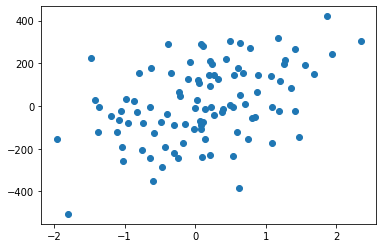

In [119]:
x, y = make_regression(n_samples=100, n_features=25, noise = 10) # creation d'un dataset (x, y) linéaire

plt.scatter(x[:,0], y) # afficher les résultats. x_1 en abscisse et y en ordonnée

In [101]:
# Verification des dimensions
print(x.shape)
print(y.shape)

# redimensionner y
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 25)
(100,)
(100, 1)


In [102]:
# Création de la matrice X, inclut le Biais
X = np.hstack((x, np.ones((x.shape[0], 1)))) # ajoute un vecteur Biais de dimension (x.shape[0], 1)

print(X.shape)
print(X[:10])

(100, 26)
[[-0.92408038 -1.45856405  0.08260038  0.34965777 -0.06295084  0.97797047
  -0.5127793   1.48503801  0.16074735  1.33867518 -1.86962717  1.35228448
   1.16027304 -0.76623329 -0.64413998 -0.68251244 -0.502034   -0.06757203
   0.67036624 -0.81974429  1.29779302 -2.20476207 -1.82739719  0.00357903
  -0.30911264  1.        ]
 [ 0.69784804  1.33206789  0.00646131  1.67255313  0.06083438  0.59359433
  -0.81675491 -0.12061656 -0.13180875 -0.92400949 -0.3477291   0.94677519
   0.51495499 -0.09978296  0.26406789 -0.08455844 -0.52830206  0.11838804
  -0.23748185 -1.43686888 -0.50886705  0.70361307  0.41156001 -0.04971784
  -0.88291623  1.        ]
 [-0.92946309  0.23349356  1.35172876  0.61135499 -1.31911766  0.48663973
  -0.77520149 -1.21089264  0.24866621 -0.90968297 -1.4621442   0.83138504
  -1.19247741  0.95724024  0.38679734 -0.20722686 -0.53403336  0.00640748
   0.38235208  0.75456728  0.0447372   1.38896266 -0.11536871 -1.29829955
  -0.30884888  1.        ]
 [-0.63041197 -2.2191

In [103]:
# Initialisation du vecteur theta aléatoire, avec 3 éléments (car X a trois colonnes)
theta = np.random.randn(3, 1)
theta

array([[-0.66183707],
       [ 1.0473832 ],
       [ 0.43641827]])

Modèle Linéaire

In [105]:
def model(X, theta):
    return X.dot(theta)

ValueError: x and y must be the same size

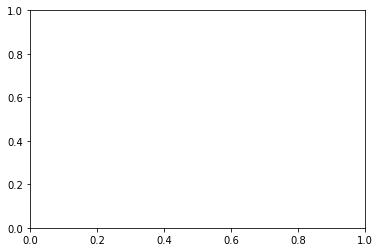

In [106]:
plt.scatter(x, y)
plt.scatter(x, model(X, theta), c='r')

Fonction Cout : Erreur Quadratique moyenne

In [107]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [108]:
cost_function(X, y, theta)

ValueError: shapes (100,26) and (3,1) not aligned: 26 (dim 1) != 3 (dim 0)

Gradients et Descente de Gradient

In [109]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [110]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

Phase d'entrainement

In [111]:
n_iterations = 1000
learning_rate = 0.01

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

ValueError: shapes (100,26) and (3,1) not aligned: 26 (dim 1) != 3 (dim 0)

In [116]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

theta_final

NameError: name 'theta_final' is not defined

NameError: name 'predictions' is not defined

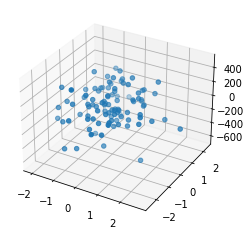

In [117]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], y)
ax.scatter(x[:,0], x[:,1], predictions)

Courbes d'apprentissage

In [118]:
plt.plot(range(n_iterations), cost_history)

NameError: name 'cost_history' is not defined

Evaluation finale

In [ ]:
coef_determination(y, predictions)

In [ ]:
# Coefficient de détermination ( R2 carré)

model = make_pipeline(PolynomialFeatures(2), LinearRegression())

model.fit(X, y)  # entrainer
model.score(X, y)  # evaluer 
#model.predict(X) # nouvelles predictions

Polynomial Features

Prediction 